In [121]:
# %pip install matplotlib pyqt5 --quiet

In [122]:
import matplotlib.pyplot as plt
import random
import math
import os
import shutil
from IPython.display import display, clear_output

In [123]:
%matplotlib inline

In [124]:
shutil.rmtree('criacao_base', ignore_errors=True)
os.makedirs('criacao_base', exist_ok=True)

In [125]:
tamanho = (500, 500)
ponto_inicial_final = (0, 0), tamanho
raio_size = 50
visual_s = 5
qtd_centroides = 10
paciencia = 10

In [126]:
def inserir_circulo(ax, x, y, raio_size, visual_s, color_centro, color_ext):
    valores_adicionados = []
    
    valor_baixo = (x, y - raio_size)
    valor_cima = (x, y + raio_size)
    valor_esquerda = (x - raio_size, y)
    valor_direita = (x + raio_size, y)

    valores_adicionados.append(ax.scatter(x, y, color=color_centro, s=visual_s))
    valores_adicionados.append(ax.scatter(*valor_baixo, color=color_ext, s=visual_s))
    valores_adicionados.append(ax.scatter(*valor_cima, color=color_ext, s=visual_s))
    valores_adicionados.append(ax.scatter(*valor_esquerda, color=color_ext, s=visual_s))
    valores_adicionados.append(ax.scatter(*valor_direita, color=color_ext, s=visual_s))
    valores_adicionados.append(plt.Circle((x, y), raio_size, color=color_ext, fill=False))
    
    ax.add_patch(valores_adicionados[-1])

    posicao_circulo = (valor_baixo, valor_cima, valor_esquerda, valor_direita)
    return valores_adicionados, posicao_circulo

def salvar_e_exibir(figura, nome_arquivo):
    figura.savefig(nome_arquivo, bbox_inches='tight', pad_inches=0.1, dpi=150)
    clear_output(wait=True)
    display(figura)

def remover_valores_pintados(valores_pintados):
    for valor_adicionado in valores_pintados:
        valor_adicionado.remove()

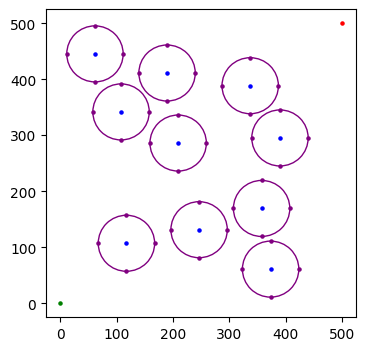

In [127]:
fig, ax = plt.subplots(figsize=(4, 4))

# ax.axis('off')
ax.scatter(*ponto_inicial_final[0], color='green', s=visual_s)
ax.scatter(*ponto_inicial_final[1], color='red', s=visual_s);
plt.savefig('criacao_base/0_pontos_iniciais.png', bbox_inches='tight', pad_inches=0.1, dpi=150)

centroids = []
posicoes_centroides = []

interacao_atual = 0
paciencia_atual = 0

def verificar_distancia(x1, y1, x2, y2, raio_size) -> bool:
    distancia_x = x2 - x1
    distancia_y = y2 - y1
    distancia_euclidiana = math.sqrt(distancia_x ** 2 + distancia_y ** 2)
    return distancia_euclidiana < 2 * raio_size

while len(centroids) < qtd_centroides and paciencia_atual < paciencia:

    interacao_atual += 1
    paciencia_atual += 1
    
    x = random.uniform(0 + raio_size, tamanho[0] - raio_size)
    y = random.uniform(0 + raio_size, tamanho[1] - raio_size)

    if verificar_distancia(x, y, *ponto_inicial_final[0], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto inicial.')
        continue
    
    elif verificar_distancia(x, y, *ponto_inicial_final[1], raio_size):
        print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto final.')
        continue

    for centroid in centroids:
        if verificar_distancia(centroid[0], centroid[1], x, y, raio_size):
            print(f'Centroid {centroid} está dentro da área de influência do ponto ({x}, {y}).')
            valores_pintados, _ = inserir_circulo(ax, x, y, raio_size, visual_s, 'red', 'orange')
            salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid_falha.png')
            remover_valores_pintados(valores_pintados)
            break
    else:
        _, posicao_circulo = inserir_circulo(ax, x, y, raio_size, visual_s, 'blue', 'purple')
        salvar_e_exibir(fig, f'criacao_base/{interacao_atual}_centroid.png')
        
        centroids.append((x, y))
        posicoes_centroides.append(posicao_circulo)
        paciencia_atual = 0
    

plt.close(fig)